# 1. 결정트리

## 1. 데이터셋 불러오기 및 전처리

화이트와인(클래스:1) 레드와인(클래스:2) 구분하는 과제
https://itstory1592.tistory.com/13


In [8]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [9]:
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [10]:
wine.info()

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [12]:
# 비교를 위한 로지스틱 회귀
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print(lr.coef_, lr.intercept_)

0.7808350971714451
0.7776923076923077
[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


가중치 순서: 알코올, 당도, ph

가중치 분석 결과 알코올과 당도가 클수록 양성 클래스(화이트 와인)일 가능성이 높아지고, ph가 클 수록 음성 클래스(레드 와인)을 가능성이 높다.

## 문제1
결정 트리는 로지스틱 회귀와 달리 데이터 scaling 과정이 필요 없다. 그 이유를 작성해주세요

답: 로지스틱 회귀는 특성값의 크기에 민감한 모델로 특성값의 크기가 다르면 모델의 가중치가 왜곡될 수 있으므로 데이터 스케일링이 필요하지만, 결정트리는 데이터의 특정 값을 기준으로 분할하며 이는 데이터의 절대적인 크기에 의존하지 않으므로 데이터 스케일링 과정이 필요없다   

In [13]:
# 결정 트리
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))


0.996921300750433
0.8592307692307692


## 2. 결정트리 그래프로 확인
로지스틱 회귀 점수에 비해 결정트리에서 매우 높은 점수가 나타났다. 과대적합이 의심된다

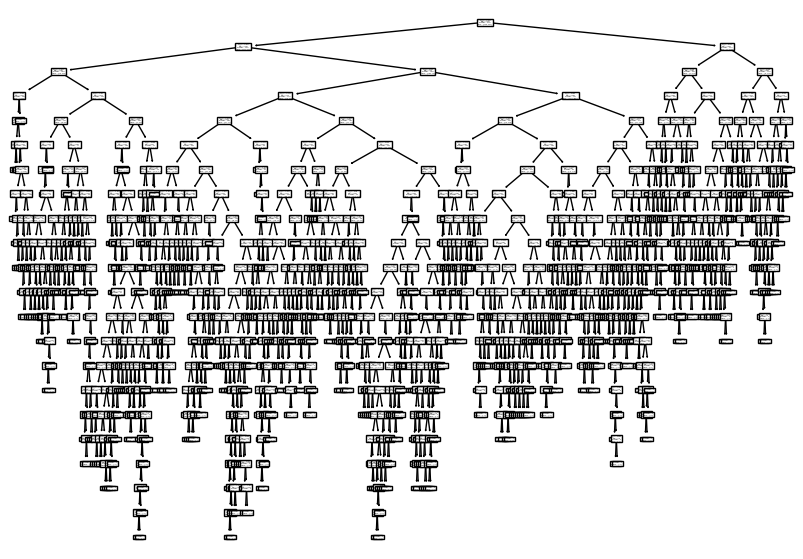

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

## 3. 가지치기 pruning
가지치기를 사용하여 오버피팅된 결정트리를 최적화하기




## 문제 2 코드를 완성하세요

In [15]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
# 깊이를 조정하는 방법
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


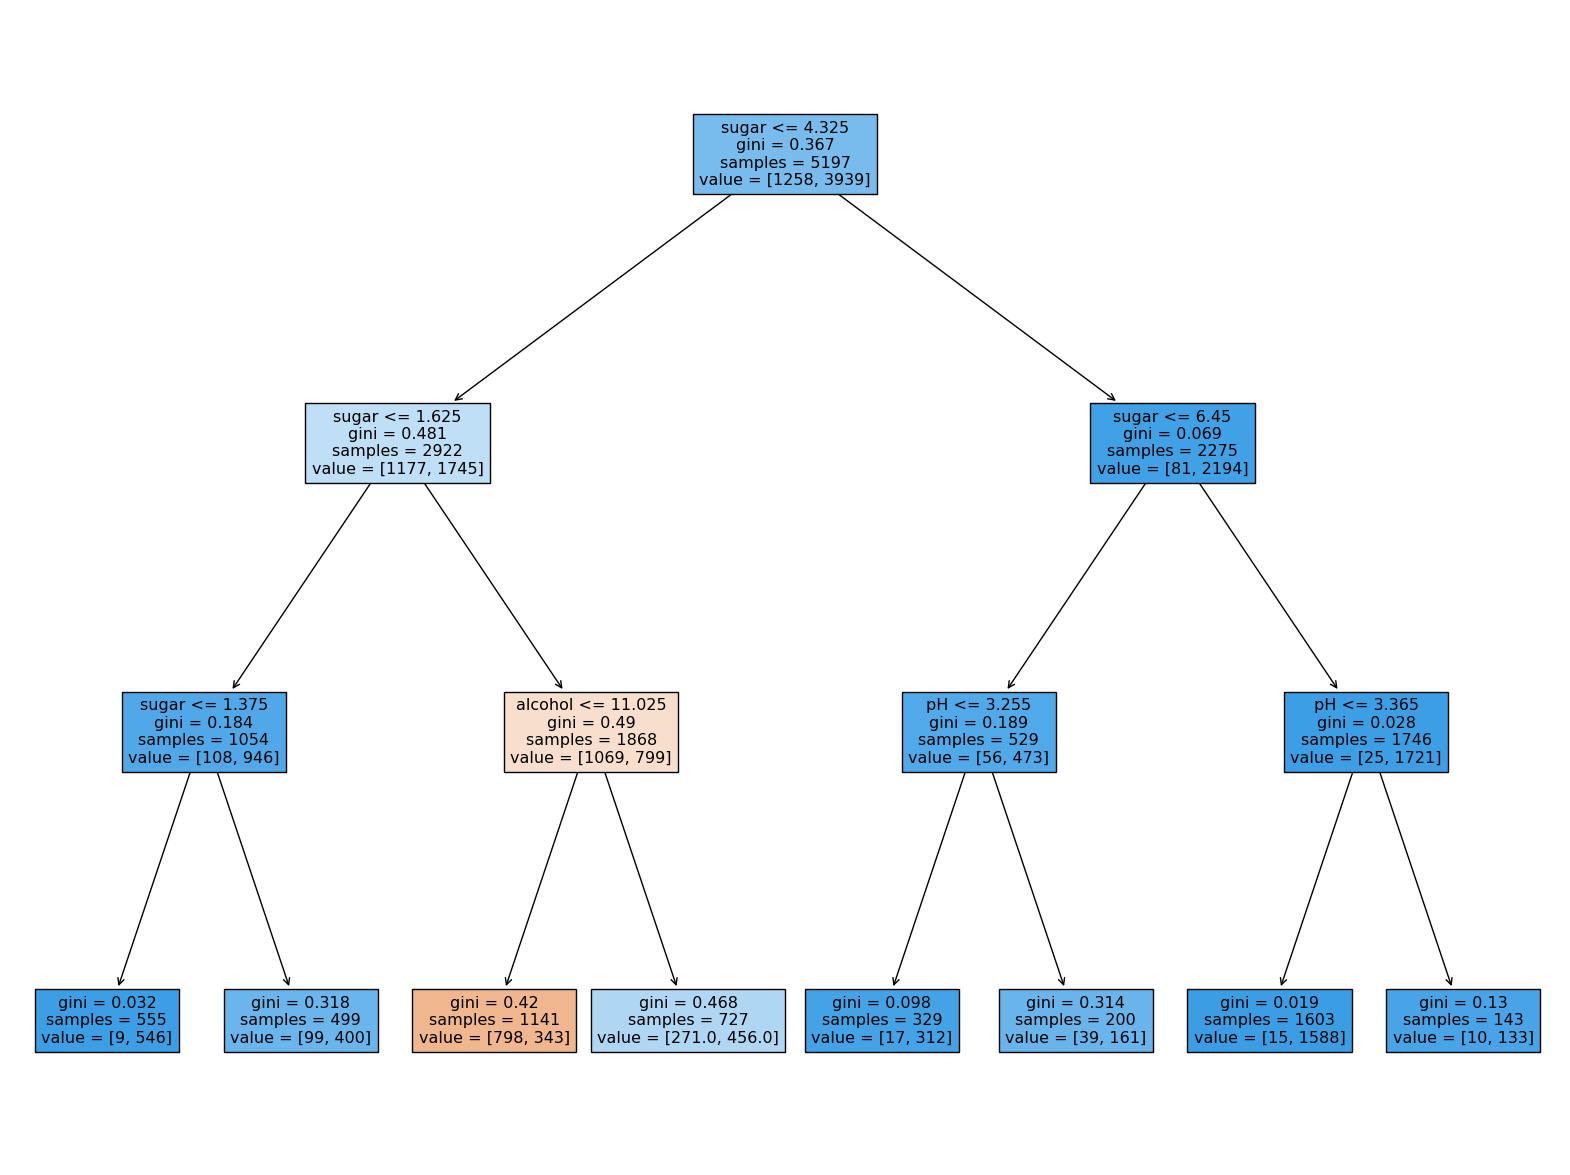

In [16]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [17]:
# 특성 중요도
print('  alcohol      sugar       pH')
print(dt.feature_importances_)

  alcohol      sugar       pH
[0.12345626 0.86862934 0.0079144 ]


In [18]:
#하이퍼파라미터 값을 위한 그리드 서치


from sklearn.model_selection import GridSearchCV
import numpy as np

params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

# min_impurity_decrease : 최소 불순도
# min_impurity_split : 나무 성장을 멈추기 위한 임계치
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

print(gs.best_params_)

dt = gs.best_estimator_
print(dt.score(test_input, test_target))

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}
0.8615384615384616


# 2. SVM

암 진단이 양성인지 악성인지 여러 관찰/특징에 기초하여 예측한다.
30가지 기능이 사용되며, 예:
- 반지름(둘레의 중심에서 점까지의 거리 mean)
- 텍스처(회색 스케일 값의 표준 편차)
- 둘레의면적
- 평활도(반지름 길이의 국부적 변화)
- 콤팩트성 (perimeter^2 / 면적 - 1.0)
- 오목한 부분(윤곽의 오목한 부분의 severity)
- 오목한 점(윤곽의 오목한 부분의 수)
- 대칭성
- 프랙탈 차원("coastline 근사" - 1)

대상 클래스: 악성, 양성


## 1. 데이터 불러오기

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
df_cancer=pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns= np.append(cancer['feature_names'], ['target']))
df_cancer.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


## 2. 데이터 시각화

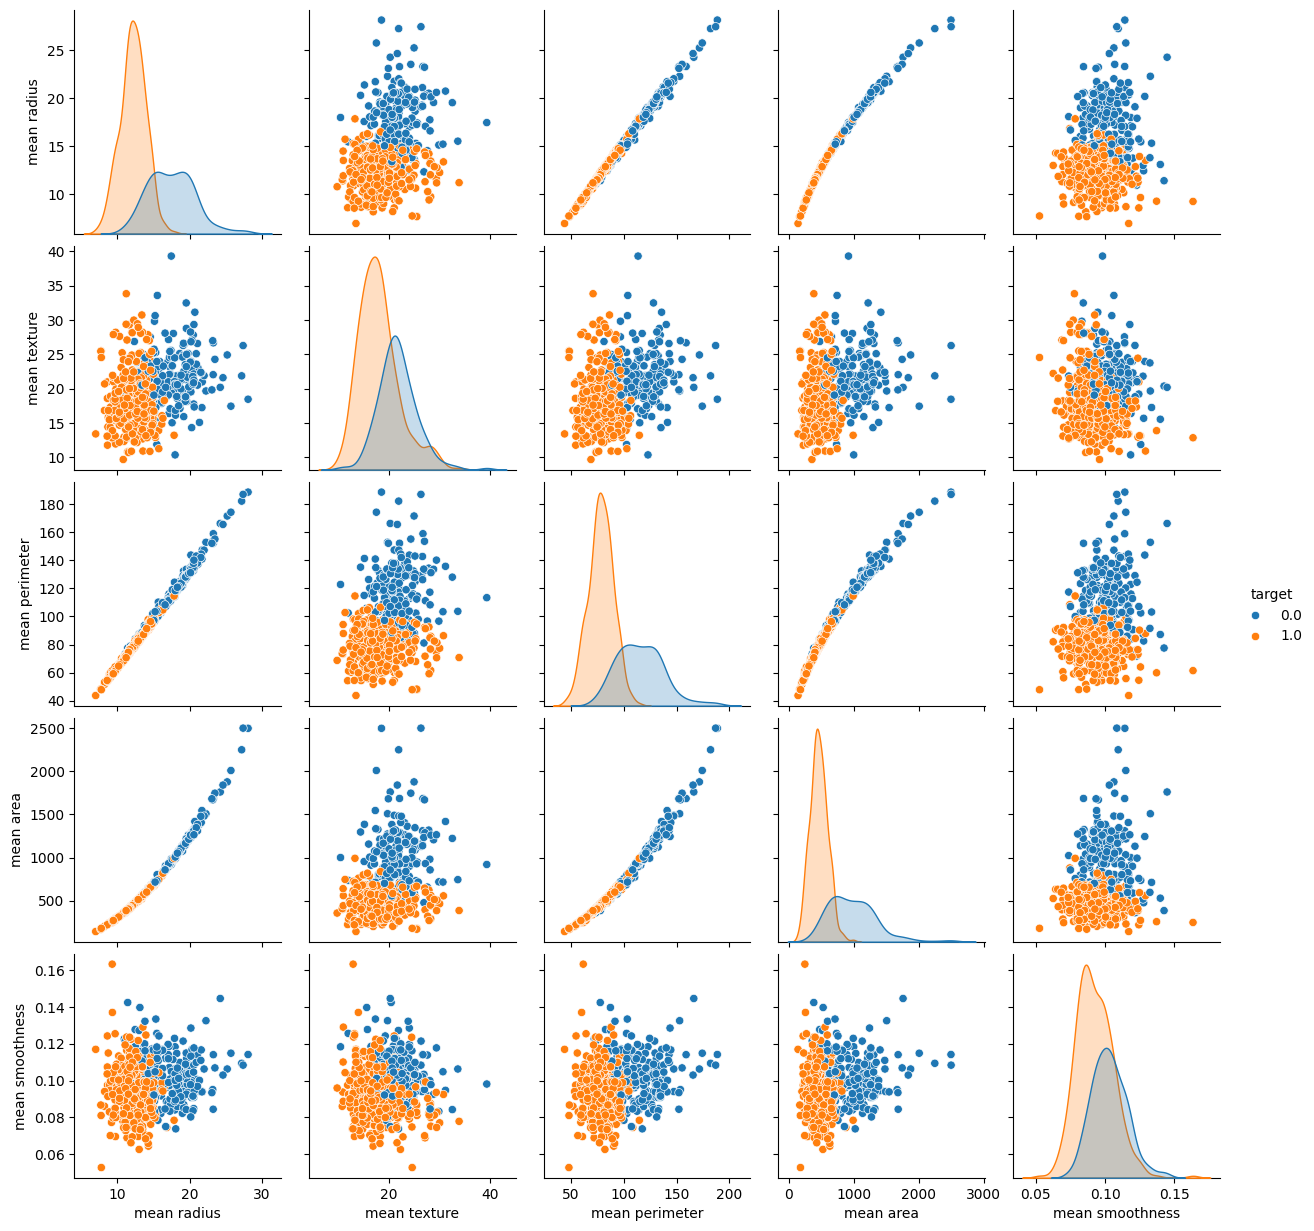

In [20]:
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])

<Axes: >

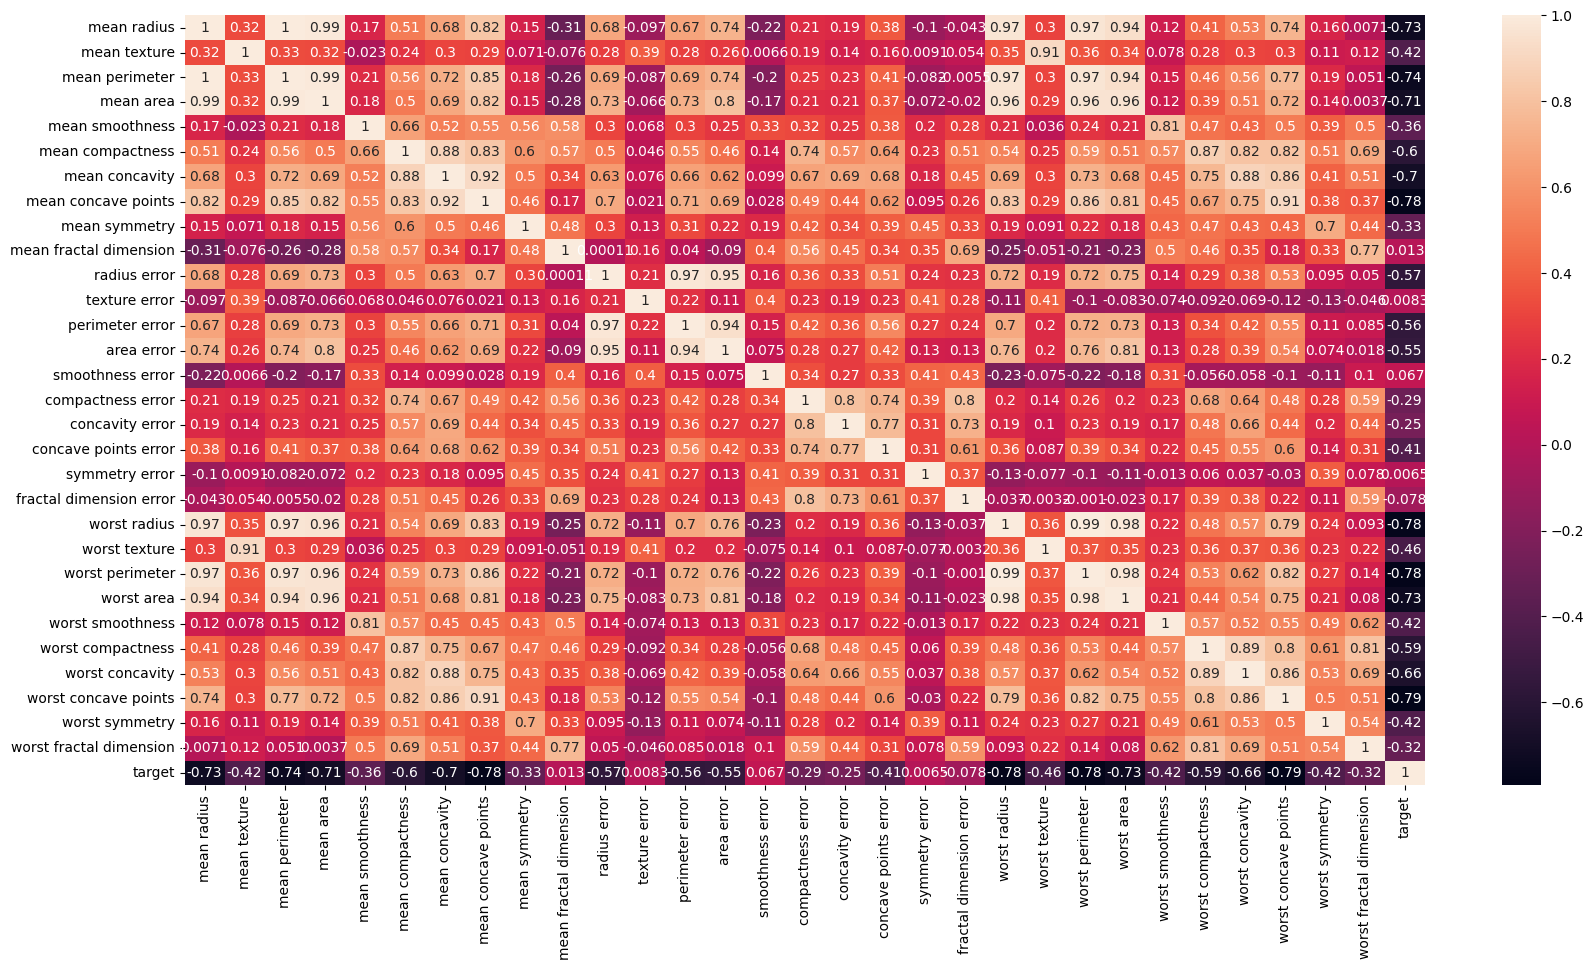

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cancer.corr(), annot=True)

## 3. 학습

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

X=df_cancer.drop(['target'], axis=1)
y=df_cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc_model=SVC()
svc_model.fit(X_train, y_train)

SVC()

<Axes: >

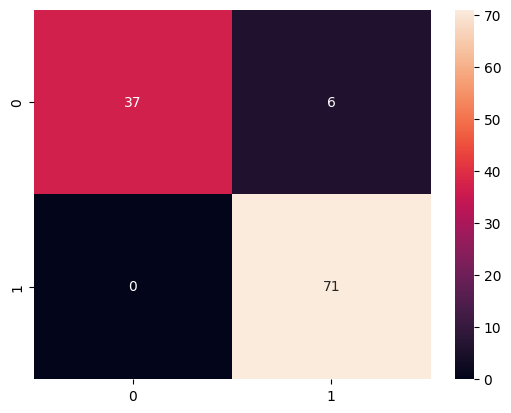

In [23]:
y_predict=svc_model.predict(X_test)
cm=confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

## 4. 모델 개선

<Axes: >

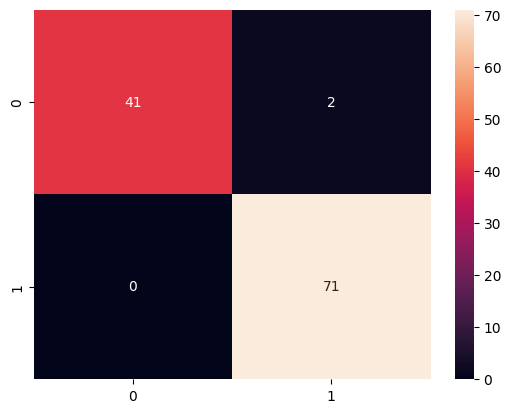

In [40]:
# scaling

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

svc_model.fit(X_train_scaled, y_train)
y_predict=svc_model.predict(X_test_scaled)
cm=confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d")

In [81]:
# 잘못 예측한 값 확인
y_test_array = np.array(y_test)
y_predict_array = np.array(y_predict)

misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_test_array, y_predict_array)) if true != pred]
misclassified_samples = pd.DataFrame({
    'Index': misclassified_indices,
    'True Value': y_test_array[misclassified_indices],
    'Predicted Value': y_predict_array[misclassified_indices]
})

print(misclassified_samples)

   Index  True Value  Predicted Value
0     13         0.0              1.0
1     20         0.0              1.0
2     77         0.0              1.0
3     82         0.0              1.0
4     91         1.0              0.0


In [90]:
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일링된 데이터를 데이터프레임으로 변환
train_data = pd.DataFrame(X_train_scaled, columns=[f'feature_{i}' for i in range(X_train_scaled.shape[1])])
train_data['target'] = y_train

test_data = pd.DataFrame(X_test_scaled, columns=[f'feature_{i}' for i in range(X_test_scaled.shape[1])])
test_data['target'] = y_test

# 결측값이 있는 행 제거
train_data = train_data.dropna(subset=['target'])
test_data = test_data.dropna(subset=['target'])

# PyCaret 설정
clf_setup = setup(data=train_data, target='target', session_id=42, log_experiment=False, experiment_name='clf_experiment')


,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(370, 31)"
4,Transformed data shape,"(370, 31)"
5,Transformed train set shape,"(259, 31)"
6,Transformed test set shape,"(111, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [ ]:


# 모델 비교 및 최적 모델 선택
best_model = compare_models()

# 최적 모델로 예측 수행
predictions = predict_model(best_model, data=test_data)

# Confusion matrix 계산 및 시각화
cm = confusion_matrix(test_data['target'], predictions['Label'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 최적 모델 정보 출력
print("Best model found by PyCaret:")
print(best_model)

## 문제 3
confusion matrix 개선을 위한 다른 방법을 제시해주세요. 아래에 코드로 작성해주세요.

In [52]:
# svc_model의 파라미터를 디폴트 값이 아니라 경진대회에서 자주 사용되는 optuna 튜닝을 통해 최적화를 진행하여 개선한다 

import optuna
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


def objective(trial):
    # 하이퍼파라미터 샘플링
    C = trial.suggest_loguniform('C', 1e-5, 1e2)
    gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
    kernel = trial.suggest_categorical('kernel', ['rbf', 'sigmoid', 'poly'])
    
    # 모델 생성 및 학습
    svc = SVC(C=C, gamma=gamma, kernel = kernel ,random_state=42)
    svc.fit(X_train, y_train)
    
    # 예측 및 정확도 계산
    y_pred = svc.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return f1

# Optuna 스터디 생성 및 최적화
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


[I 2025-02-09 00:11:30,487] A new study created in memory with name: no-name-521c95ac-520c-48a3-8f19-d0e5a8b1be77
C:\Users\HA\AppData\Local\Temp\ipykernel_9416\2111540758.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
C:\Users\HA\AppData\Local\Temp\ipykernel_9416\2111540758.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
[I 2025-02-09 00:11:30,519] Trial 0 finished with value: 0.4780464675201518 and parameters: {'C': 1.725063677211875, 'gamma': 5.043310209048279e-05}. Best is trial 0 with value: 0.4780464675201518.
C:\Users\HA\AppData\Local\Temp\ipykernel_9416\21

In [47]:
# 최적 하이퍼파라미터 출력
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

Best trial:
  Value: 0.9736842105263158
  Params: 
    C: 0.8622912501172331
    gamma: 0.00015960923267241162


In [48]:
# 최적 하이퍼파라미터로 모델 학습 
best_params = trial.params
best_svc = SVC(**best_params, random_state=42)
best_svc.fit(X_train, y_train)
y_pred = best_svc.predict(X_test)


Test Accuracy: 0.9736842105263158
